In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Loading dataset
from google.colab import drive
drive.mount('/content/drive/')
data=pd.read_csv('heart_disease.csv')
data

Mounted at /content/drive/


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


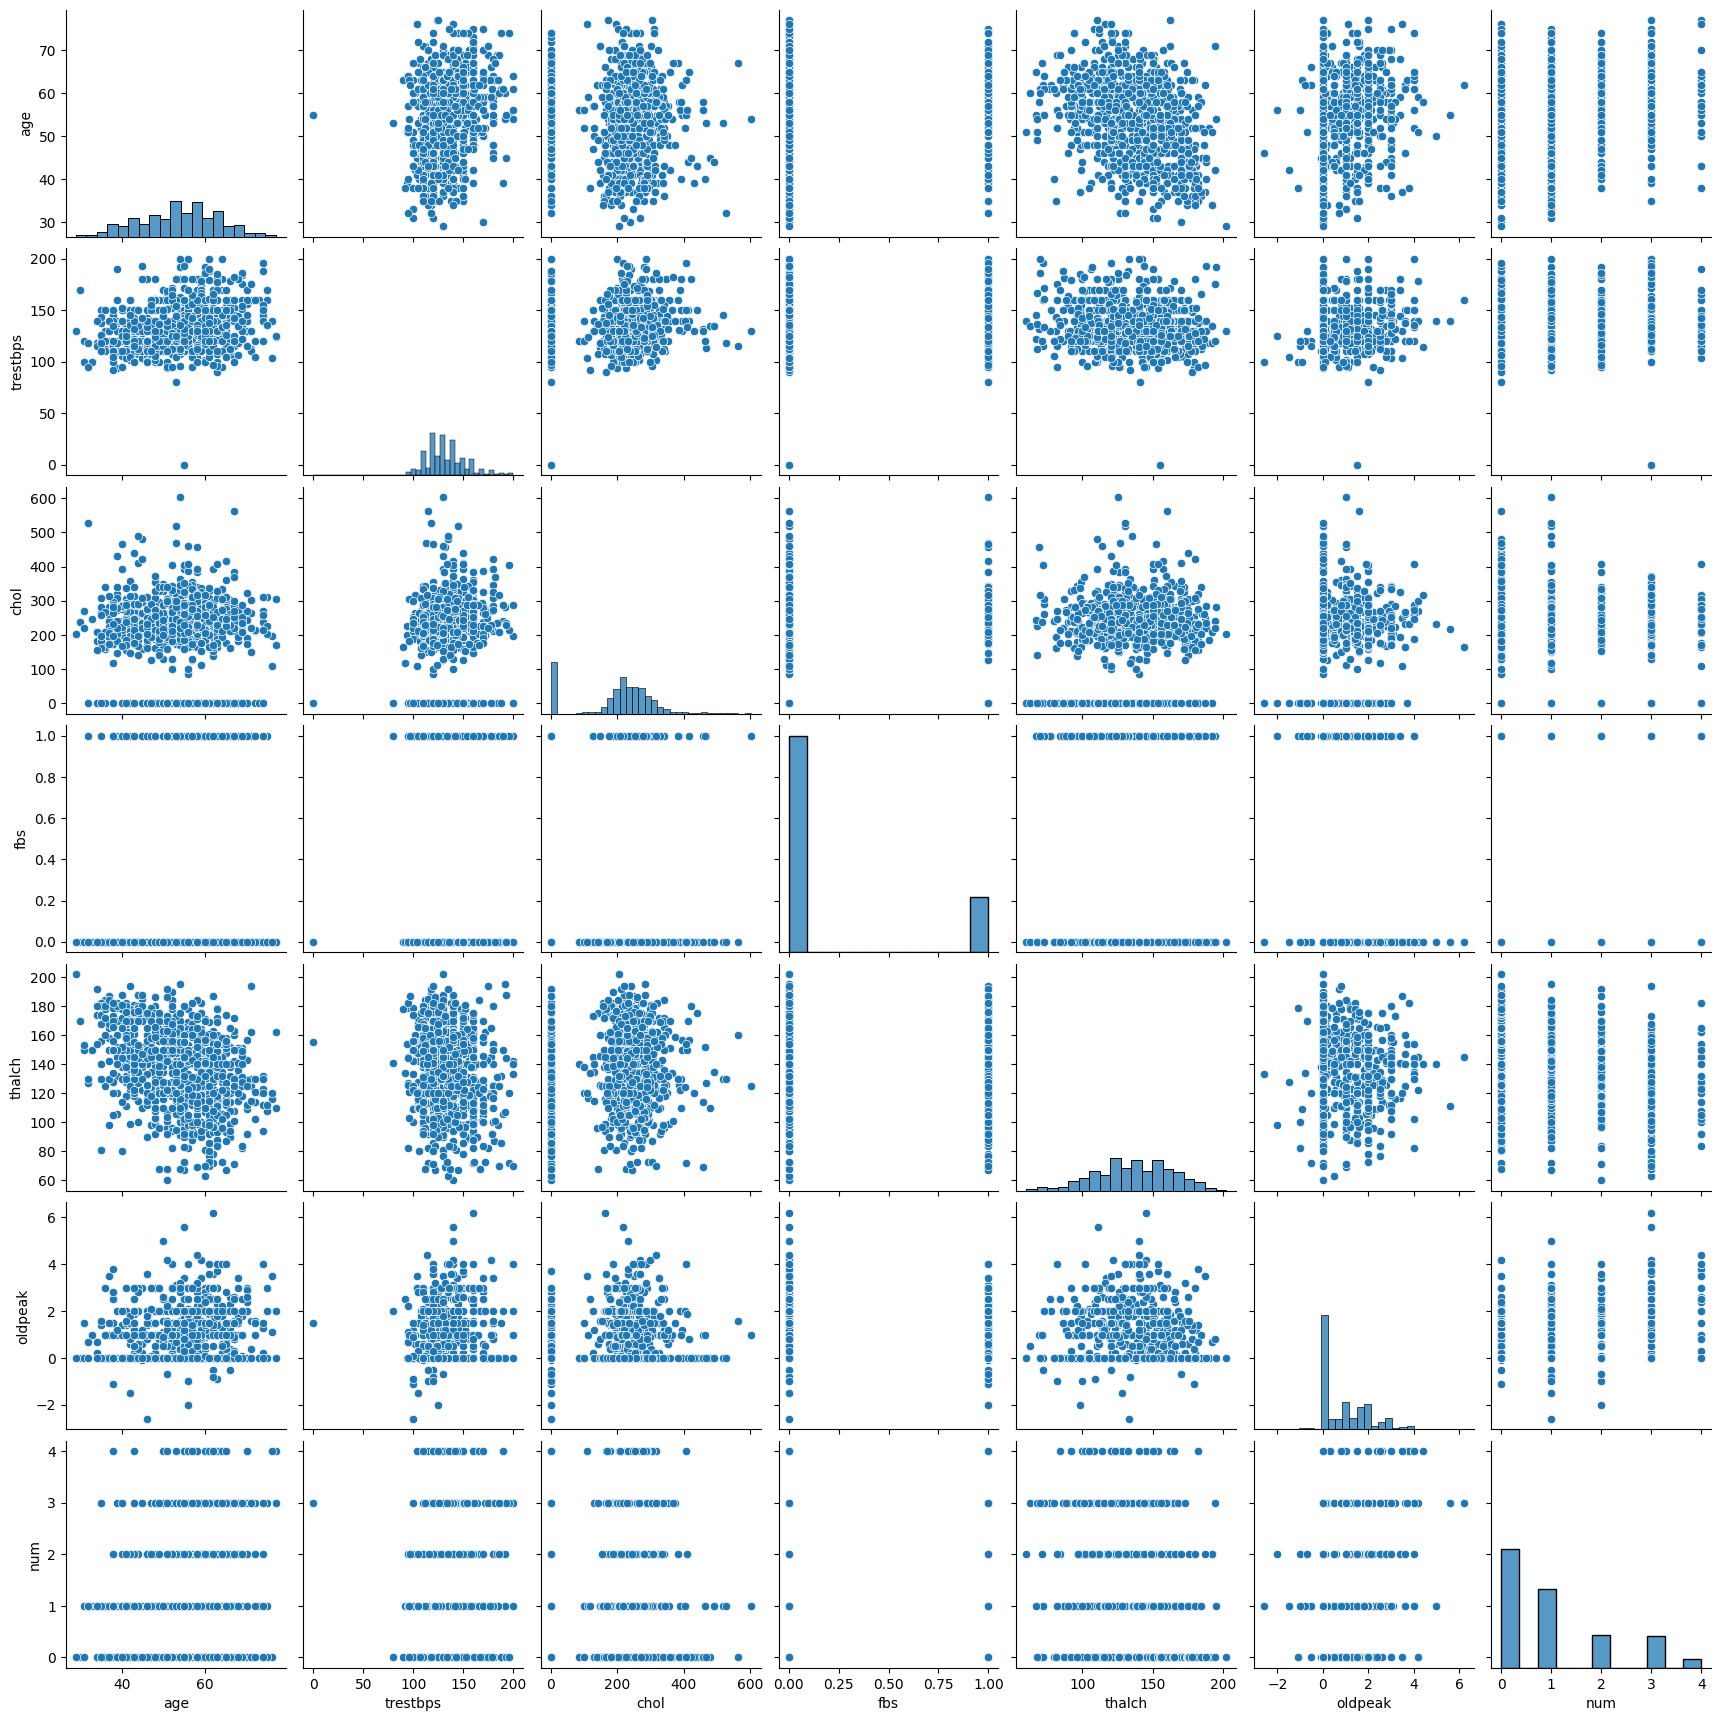

In [ ]:
#Exploratory Data Analysis (EDA)
# Check for missing values
print(data.isnull().sum())

# Check for outliers and inconsistencies
# Visualize the distribution of features

sns.pairplot(data)
plt.show()


In [ ]:
#Feature Engineering
data = pd.get_dummies(data)

# Scale numerical features


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data = data.dropna()

In [ ]:
#Decision Tree Classification
# Split dataset into training and testing sets
X = data.drop('age', axis=1)
y = data['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Decision Tree Classification model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Evaluate performance
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='micro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.023529411764705882
Precision: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1        0.
 0.         0.         0.         0.         0.         0.14285714
 0.         0.         0.         0.125      0.         0.
 0.         0.         0.         0.25       0.         0.
 0.         0.         0.         0.         0.         0.        ]
Recall: [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.25  0.    0.    0.    0.    0.    0.    0.125
 0.    0.    0.    0.125 0.    0.    0.    0.    0.    0.5   0.    0.
 0.    0.    0.    0.    0.    0.   ]
F1 Score: 0.02352941176470588


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Hyperparameter Tuning
# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


Tuned Model Evaluation:
Accuracy: 0.058823529411764705
Precision: 0.058823529411764705
Recall: 0.058823529411764705
F1 Score: 0.058823529411764705


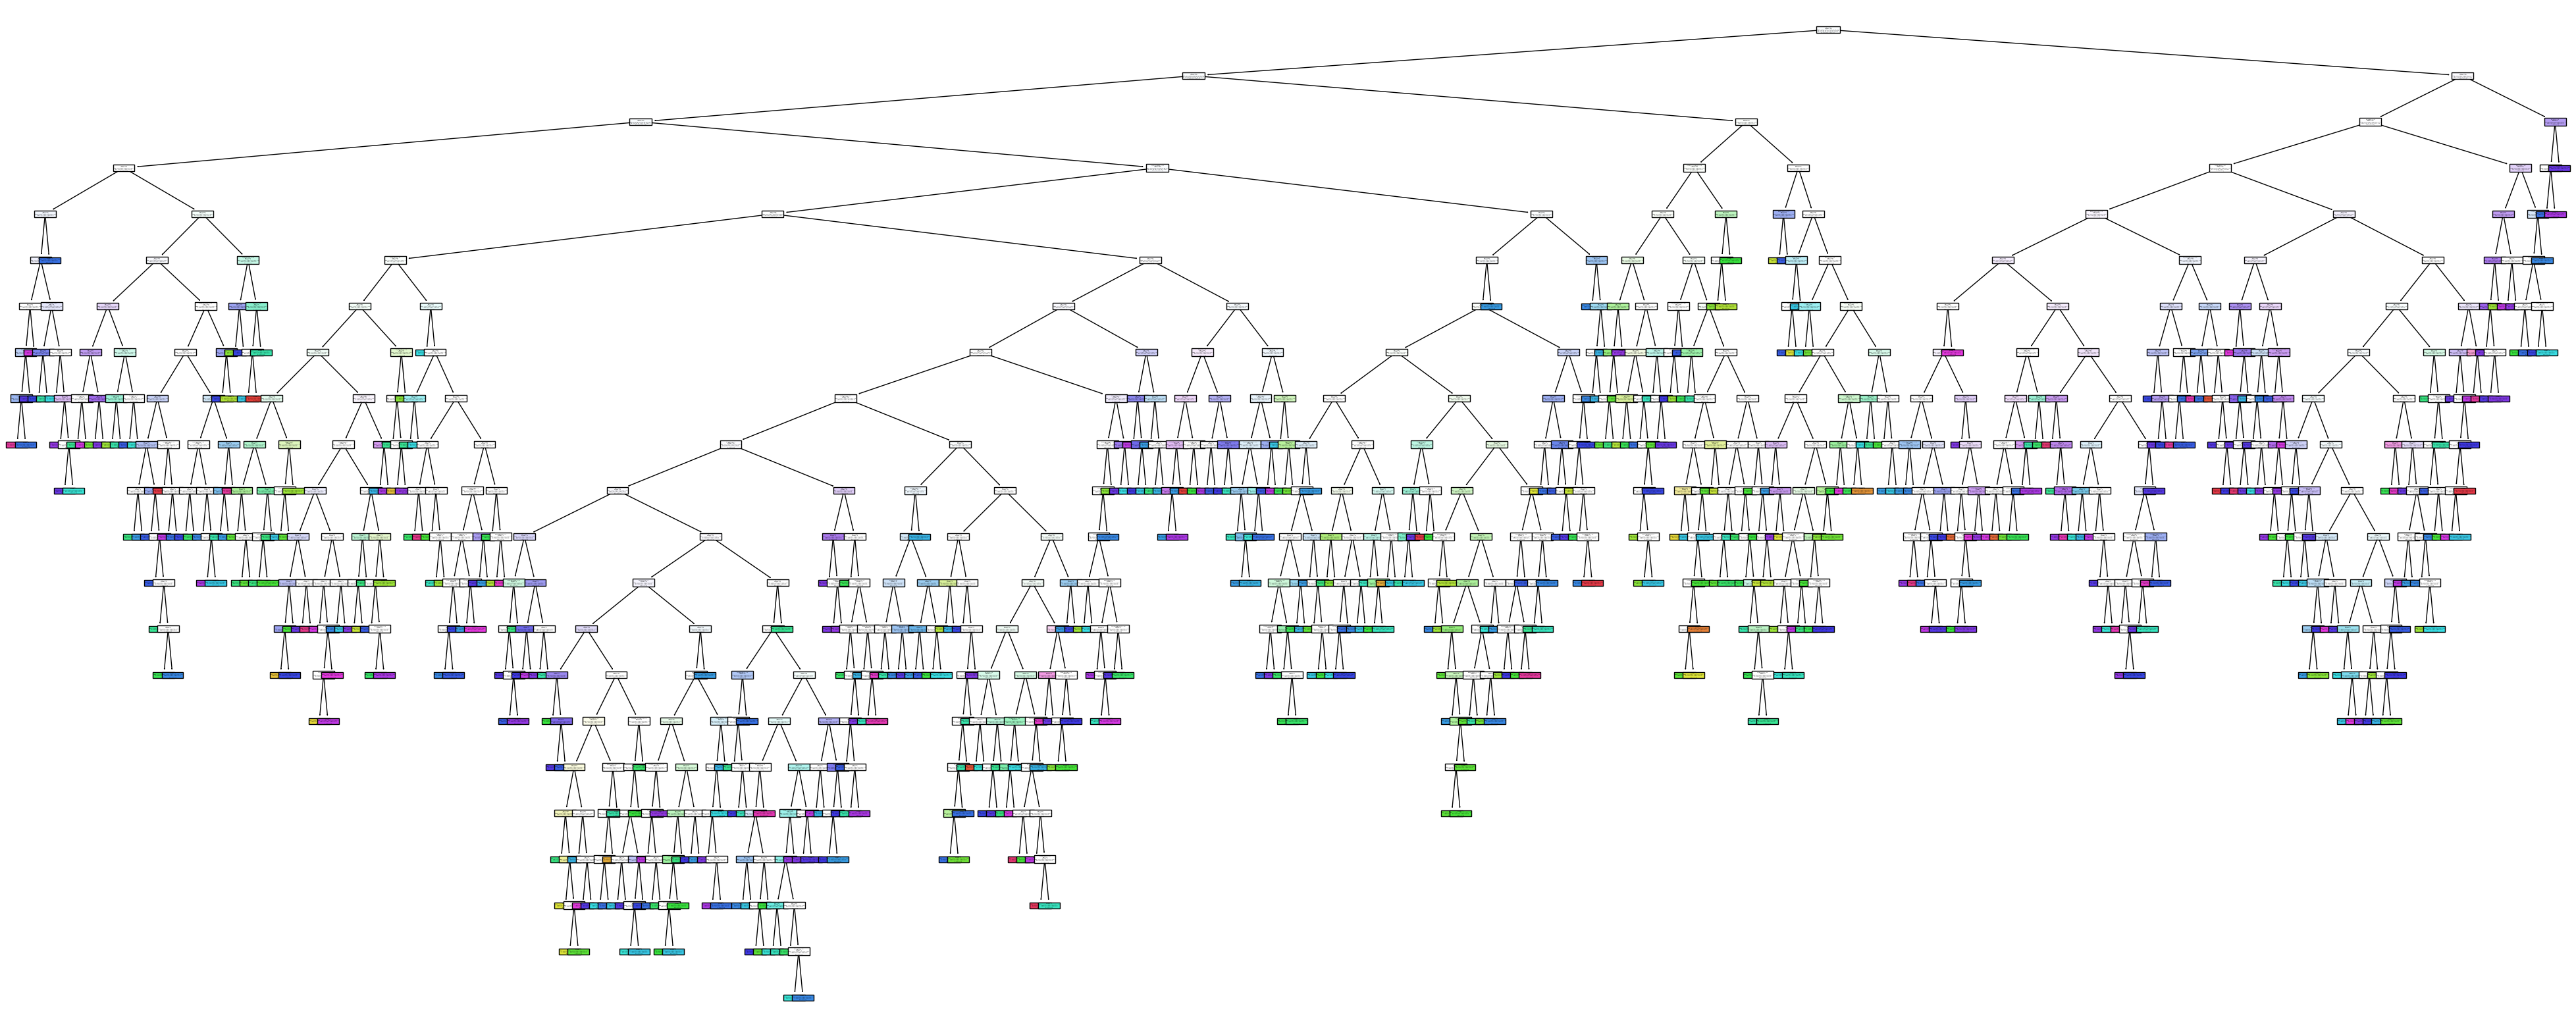

In [ ]:
#Model Evaluation and Analysis
# Re-train model with best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Evaluate performance of tuned model
y_pred_tuned = best_dt_classifier.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='micro')
recall_tuned = recall_score(y_test, y_pred_tuned, average='micro')
f1_tuned = f1_score(y_test, y_pred_tuned, average='micro')


print("Tuned Model Evaluation:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)


# Visualize decision tree structure
from sklearn.tree import plot_tree

#plt.figure(figsize=(20, 10))
#plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
#plt.show()

plt.figure(figsize=(50,20))
try:
    plot_tree(dt_classifier, filled=True, feature_names=X.columns,)
    plt.show()
except IndexError as e:
    print("An IndexError occurred:", e)


# ***Interview questions***

1) **What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**
- Common Hyperparameters of Decision Tree Models:

**Max Depth:** Limits the depth of the tree. Higher values can lead to overfitting.
Min Samples Split: Minimum number of samples required to split an internal node. Higher values can prevent overfitting.
**Criterion:** Function to measure the quality of a split. Common values are "gini" for Gini impurity and "entropy" for information gain.
**Min Samples Leaf:** Minimum number of samples required to be at a leaf node. Similar to min_samples_split but applies to leaf nodes.
**Max Features:** The number of features to consider when looking for the best split. Higher values can lead to overfitting.

These hyperparameters affect the complexity of the decision tree and its ability to generalize to unseen data. Tuning them appropriately can help balance model complexity and performance.
- - -

2) **What is the difference between the Label encoding and One-hot encoding?**

- **Label Encoding:** In label encoding, each category in a categorical feature is assigned a unique integer label. It's suitable for ordinal categorical variables where the categories have a meaningful order. However, it may introduce ordinality where there isn't any, potentially leading to misleading model interpretations.

- **One-Hot Encoding:** In one-hot encoding, each category is converted into a binary vector where each element represents the presence or absence of a category. It's suitable for nominal categorical variables without any inherent order. One-hot encoding prevents the model from interpreting categorical variables as ordinal and avoids the issue of introducing misleading ordinality. However, it can lead to a high-dimensional feature space, especially with a large number of categories.


In summary, label encoding assigns integers to categories, while one-hot encoding creates binary vectors to represent categories, preserving the categorical nature of the data.